# Image Processing with Keras in Python

## One dimensional convolutions


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import color
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [2]:
array = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
kernel = np.array([1, -1, 0])
conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Output array
for ii in range(8):
    conv[ii] = (kernel * array[ii:ii+3]).sum()

# Print conv
print(conv)

[ 1 -1  1 -1  1 -1  1 -1  0  0]


## Image convolutions

The convolution of an image with a kernel summarizes a part of the image as the sum of the multiplication of that part of the image with the kernel.

In [3]:
im = plt.imread("data/Screen Shot 2020-07-23 at 9.13.46 PM.png")
im = color.rgb2gray(color.rgba2rgb(im))

In [4]:
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
result = np.zeros(im.shape)

# Output array
for ii in range(im.shape[0] - 3):
    for jj in range(im.shape[1] - 3):
        result[ii, jj] = (im[ii:ii+3, jj:jj+3] * kernel).sum()

# Print result
print(result)

[[0.94117641 0.94117641 0.94117641 ... 0.         0.         0.        ]
 [0.48474509 0.48474509 0.48755062 ... 0.         0.         0.        ]
 [1.9779737  1.98077923 1.99002904 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


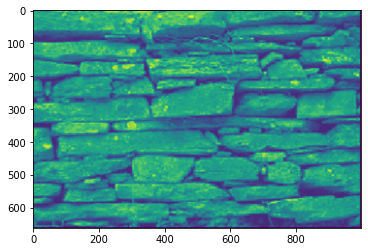

In [5]:
plt.imshow(result)

## Defining image convolution kernels

the following kernel finds a vertical line in images:

In [6]:
kernel = np.array([[-1, 1, -1], 
                   [-1, 1, -1],
                   [-1, 1, -1]])

## Convolutional network for image classification


In [7]:
img_rows = 28
img_cols = 28

In [8]:
# Initialize the model object
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
               input_shape=(img_rows, img_cols, 1)))

# Flatten the output of the convolutional layer
model.add(Flatten())
# Add an output layer for the 3 categories
model.add(Dense(3, activation='softmax'))

In [9]:
# Compile the model 
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# # Fit the model on a training set
# model.fit(train_data, train_labels, 
#           validation_split=0.2, 
#           epochs=3, batch_size=10)

In [10]:
# # Evaluate the model on separate test data
# model.evaluate(test_data, test_labels, batch_size=10)

## Add padding to a CNN

Add a Conv2D layer and choose a padding such that the output has the same size as the input.

In [11]:
# Initialize the model
model = Sequential()

# Add the convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
                 input_shape=(img_rows, img_cols, 1), 
                 padding='same'))

# Feed into output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

With strides set to 2, the network skips every other pixel.

In [12]:
# Initialize the model
model = Sequential()

# Add the convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
              input_shape=(img_rows, img_cols, 1), 
              strides=2))

# Feed into output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))